In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm
import random

In [2]:
reviews = pd.read_csv("Updated_reviews.csv")

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
reviews = reviews.drop('Unnamed: 0', axis = 1)

In [8]:
#Querying by helpful and not helpful reviews
helpful = reviews[reviews['Helpful_review'] == 'yes']
not_helpful = reviews[reviews['Helpful_review'] == 'no']

In [13]:
helpful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56169 entries, 3 to 314994
Data columns (total 25 columns):
asin              56169 non-null object
overall           56169 non-null float64
reviewText        56142 non-null object
reviewTime        56169 non-null object
reviewerID        54140 non-null object
reviewerName      54132 non-null object
style             21479 non-null object
summary           56169 non-null object
verified          56169 non-null bool
vote              56169 non-null int64
also_buy          24972 non-null object
also_view         29460 non-null object
brand             38736 non-null object
description       46795 non-null object
details           31856 non-null object
price             26549 non-null object
rank              52417 non-null float64
similar_item      9061 non-null object
title             53987 non-null object
main_cat          56169 non-null object
category          56169 non-null object
Helpful_review    56169 non-null object
Helpfulness 

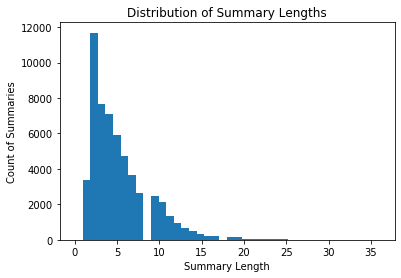

In [20]:
plt.hist(data = helpful, x = 'summary_length', bins = 40)
plt.xlabel('Summary Length')
plt.ylabel('Count of Summaries')
plt.title('Distribution of Helpful Summary Lengths')
plt.show()

In [27]:
helpful['summary_length'].describe()

count    56169.000000
mean         5.217878
std          3.685096
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: summary_length, dtype: float64

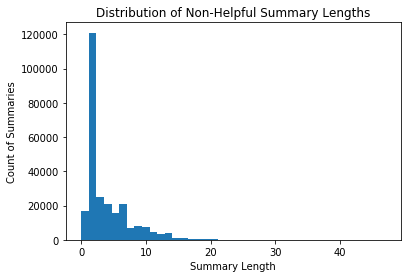

In [23]:
plt.hist(data = not_helpful, x = 'summary_length', bins = 40)
plt.xlabel('Summary Length')
plt.ylabel('Count of Summaries')
plt.title('Distribution of Non-Helpful Summary Lengths')
plt.show()

In [29]:
not_helpful['summary_length'].describe()

count    258831.000000
mean          4.083128
std           3.468818
min           0.000000
25%           2.000000
50%           2.000000
75%           5.000000
max          47.000000
Name: summary_length, dtype: float64

Text(0.5, 1.0, 'Distribution of Review Lengths')

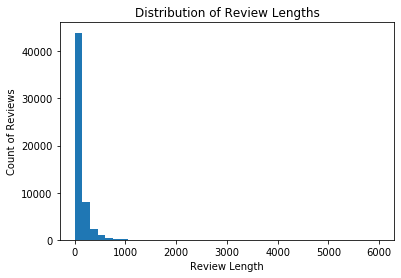

In [24]:
plt.hist(data = helpful, x = 'review_length', bins = 40)
plt.xlabel('Review Length')
plt.ylabel('Count of Reviews')
plt.title('Distribution of Review Lengths')

In [30]:
helpful['review_length'].describe()

count    56169.000000
mean       113.731507
std        155.226801
min          0.000000
25%         32.000000
50%         67.000000
75%        135.000000
max       6003.000000
Name: review_length, dtype: float64

Text(0.5, 1.0, 'Distribution of Not Helpful Review Lengths')

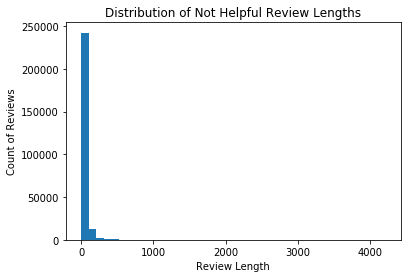

In [25]:
plt.hist(data = not_helpful, x = 'review_length', bins = 40)
plt.xlabel('Review Length')
plt.ylabel('Count of Reviews')
plt.title('Distribution of Not Helpful Review Lengths')

In [31]:
not_helpful['review_length'].describe()

count    258831.000000
mean         34.787240
std          60.603503
min           0.000000
25%           6.000000
50%          19.000000
75%          39.000000
max        4209.000000
Name: review_length, dtype: float64

In [33]:
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = st.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = st.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [36]:
pearsonr_ci(helpful['summary_length'], not_helpful['summary_length'])

ValueError: x and y must have the same length.

In [38]:
len(helpful)

56169

In [39]:
len(not_helpful)

258831

In [63]:
sample_helpful_reviews = random.sample(list(helpful['review_length']), 10000)

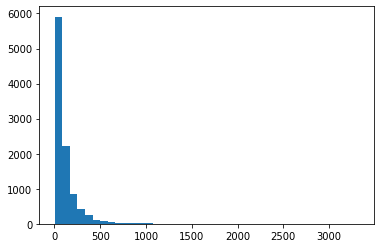

In [65]:
plt.hist(sample_helpful_reviews, bins = 40)
plt.show()

In [72]:
print(np.mean(sample_not_helpful_reviews))
print(np.std(sample_not_helpful_reviews))

34.4817
60.51231168208665


In [64]:
sample_not_helpful_reviews = random.sample(list(not_helpful['review_length']), 10000)

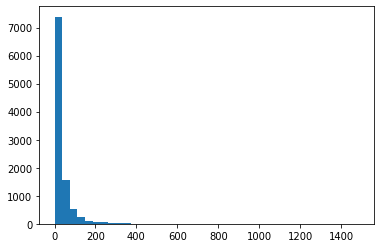

In [66]:
plt.hist(sample_not_helpful_reviews, bins = 40)
plt.show()

I want to know if the means of the sample helpful reviews and the sample of unhelpful reviews are statistically different from one another with a 95% confidence interval.

Null: mean(sample_helpful_reviews) - mean(sample_not_helpful_reviews) = 0

Alternate: mean(sample_helpful_reviews) - mean(sample_not_helpful_reviews) != 0

In [79]:
print(np.mean(sample_helpful_reviews))
print(np.std(sample_helpful_reviews))

112.8536
152.11496233783186


In [78]:
print(np.mean(sample_not_helpful_reviews))
print(np.std(sample_not_helpful_reviews))

34.4817
60.51231168208665


In [80]:
mean_diff = np.mean(reviews['review_length'])

helpful_shifted = helpful['review_length'] - np.mean(helpful['review_length']) + mean_diff
not_helpful_shifted = not_helpful['review_length'] - np.mean(not_helpful['review_length']) + mean_diff

In [84]:
samples_diff = np.mean(helpful_shifted) - np.mean(not_helpful_shifted)
empirical_diff = np.mean(helpful['review_length']) - np.mean(not_helpful['review_length'])

In [89]:
p = np.sum(samples_diff >= empirical_diff)/samples_diff
p

0.0

I reject the hypothesis that the means of the two groups are the same with an alpha level of 0.05 with a p-value of 0.0.

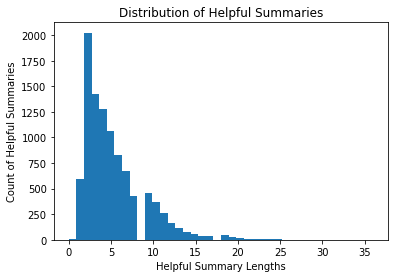

In [105]:
helpful_summary_sample = random.sample(list(helpful['summary_length']), 10000)

plt.hist(helpful_summary_sample, bins = 40)
plt.xlabel('Helpful Summary Lengths')
plt.ylabel('Count of Helpful Summaries')
plt.title('Distribution of Helpful Summaries')
plt.show()

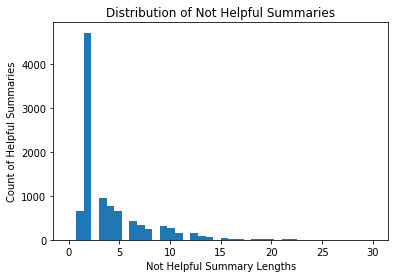

In [106]:
not_helpful_summary_sample = random.sample(list(not_helpful['summary_length']), 10000)

plt.hist(not_helpful_summary_sample, bins = 40)
plt.xlabel('Not Helpful Summary Lengths')
plt.ylabel('Count of Helpful Summaries')
plt.title('Distribution of Not Helpful Summaries')
plt.show()

In [110]:
print(np.mean(helpful_summary_sample))
print(np.std(helpful_summary_sample))

5.2118
3.650827407588587


In [112]:
print(np.mean(not_helpful_summary_sample))
print(np.std(not_helpful_summary_sample))

4.0819
3.526952280652518


I want to compare the two means of the summary lengths to see if they are statistically different.


Null: mean(helpful_summary_length) - mean(not_helpful_summary_length) = 0

Alternate: mean(helpful_summary_length) - mean(not_helpful_summary_length) != 0

In [113]:
mean_diff_summary = np.mean(reviews['summary_length'])

helpful_shifted_summary = helpful['summary_length'] - np.mean(helpful['summary_length']) + mean_diff
not_helpful_shifted_summary = not_helpful['summary_length'] - np.mean(not_helpful['summary_length']) + mean_diff

In [114]:
samples_diff = np.mean(helpful_shifted_summary) - np.mean(not_helpful_shifted_summary)
empirical_diff = np.mean(helpful['summary_length']) - np.mean(not_helpful['summary_length'])

In [117]:
p = np.sum(samples_diff >= empirical_diff)/samples_diff
p

-0.0

I reject the Null hypothesis that the two means are the same at an alpha level of 0.05 with a p-value of 0.0.

Reviews and Summaries that are deemed helpful have lengths that are statistically greater than that of unhelpful Reviews and Summaries. 